In [1]:
from scorer import Scorer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Reading...")
df = pd.read_csv("./data/large-train.csv", encoding = 'unicode_escape', low_memory=False, dtype={"FSSAI Lic No.": "str"})
df['MRP'] = pd.to_numeric(df['MRP'], errors="coerce")
print("Read done!")

Reading...
Read done!


In [2]:
scorer = Scorer()
scorer.train(df)

100%|██████████| 1351/1351 [00:03<00:00, 357.22it/s]


In [3]:
scorer(
    df.iloc[0]
)

{'likely_brand': 'nivea india pvt ltd',
 'brand_score': 1,
 'likely_product': 'nivea soft plastic_jar 200ml',
 'product_score': 1,
 'net_weight_score': 1,
 'likely_net_weight': 199.0,
 'net_weight_range': {'std': 67.64633520499589,
  'mean': 147.88,
  'median': 100.0,
  'min': 58.0,
  'max': 258.0},
 'mrp_score': 1,
 'likely_mrp': 310.0,
 'mrp_range': {'std': 52.74782775938108,
  'mean': 220.4,
  'median': 199.0,
  'min': 99.0,
  'max': 310.0},
 'weight_ratio_score': 0.9369166943049919,
 'gtin_score': 0,
 'overall_score': 0.8869710278427722}

In [4]:
scores = df.apply(lambda row: scorer(row)['overall_score'], axis=1)

In [5]:
print(f'Max: {scores.max()}')
print(f'Min: {scores.min()}')
print(f'Avg: {scores.mean()}')
print(f'Med: {scores.median()}')

Max: 1.0
Min: 0.0
Avg: 0.9102861569170441
Med: 0.9475991183035057


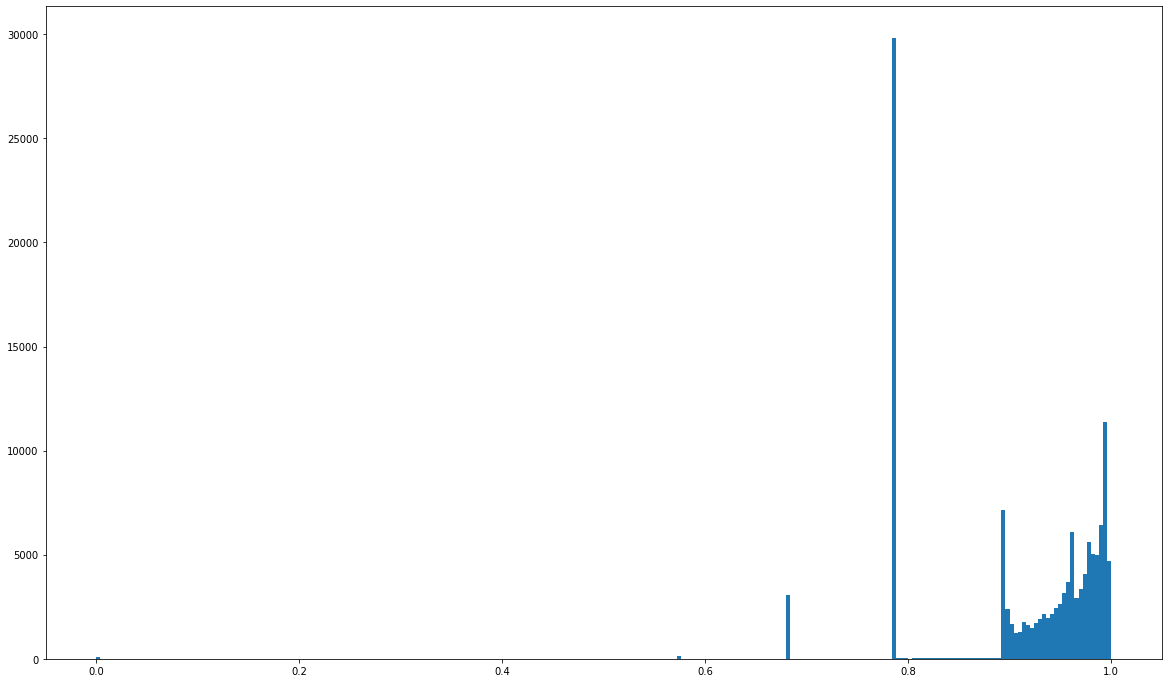

In [6]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.hist(scores, bins=250, )
plt.show()